In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.functions import *
from pyspark.mllib.stat import Statistics
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, StringType, TimestampType


from pyspark.ml.feature import VectorAssembler,StandardScaler
#from pyspark.mllib.feature import StandardScaler 

spark = SparkSession.Builder().appName('DDAM_Project_north').getOrCreate()
sqlCtx = SQLContext(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/12 09:38:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/12 09:38:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
df = spark.read.options(inferSchema = True, delimiter = ',', header = True).csv('../../Datasets/North_Incidents_Cleaned.csv')

In [6]:
pip install .

Processing /home/jovyan
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark-kmodes: filename=pyspark_kmodes-0.1.0-py3-none-any.whl size=11861 sha256=bac5a52b0822f0c0c439da7d564bcb3a76730dfec1b23bae6db6e1c72a03d6d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qb1r18c/wheels/bc/01/de/a88c3880a4c27c802b27f000f770a2fe391bdc11e738d133f7
Successfully built pyspark-kmodes
  Attempting uninstall: pyspark-kmodes
    Found existing installation: pyspark-kmodes 0.1.0
    Uninstalling pyspark-kmodes-0.1.0:
      Successfully uninstalled pyspark-kmodes-0.1.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyspark_kmodes import *

In [8]:
from pyspark.sql.functions import monotonically_increasing_id

In [9]:
df_with_row_id = df.withColumn("row_id", monotonically_increasing_id())

In [11]:
df_kmodes_id= df_with_row_id.select('row_id','City','County','Wind_Direction','Amenity','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
                     'Station','Stop','Traffic_Calming','Traffic_Signal','hour','month','season','Weather_Condition','Astronomical_Twilight','Severity', 'Working_Weekend')
df_kmodes= df.select('City','County','Wind_Direction','Amenity','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
                     'Station','Stop','Traffic_Calming','Traffic_Signal','hour','month','season','Weather_Condition','Astronomical_Twilight',
                     'Severity')

SEVERITY

In [12]:
df_kmodes_severity=df_kmodes.drop('Severity')
df_kmodes_rdd=df_kmodes_severity.rdd
n_clusters = 10
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 161.0
Run 1, iteration: 2/100, moves: 0, cost: 161.0
Avg cost/partition: 3.22
Final centroids:
['Detroit' 'Wayne' 4.0 False False False False False False False False
 False False False 7 2 'Winter' 'Cloudy' 'Day']
['Minneapolis' 'Hennepin' 70.0 False False False False False False False
 False False False False 15 9 'Autumn' 'Normal' 'Day']
['Bozeman' 'Gallatin' 25.0 False False False False False False False False
 False False False 8 3 'Spring' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' 20.0 False False False False False False False
 False False False False 23 11 'Autumn' 'Cloudy' 'Night']
['Saint Paul' 'Ramsey' 23.0 False False False False False False False
 False False False False 9 12 'Winter' 'Snow' 'Day']
['Grand Rapids' 'Kent' 50.0 False False False False False False False
 False False False False 15 5 'Spring' 'Cloudy' 'Day']
['Detroit' 'Wayne' 79.0 False False Fa

In [14]:
lista_costi=[]
lista_costi.append(method.mean_cost)

In [15]:

for k in range(2,11):
    n_clusters = k
    max_iter = 10
    method = EnsembleKModes(n_clusters, max_iter)
    model = method.fit(df_kmodes_rdd)
    lista_costi.append(method.mean_cost)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 33.0
Avg cost/partition: 3.3
Final centroids:
['Minneapolis' 'Hennepin' 63.0 False False False False False False False
 False False False False 7 12 'Spring' 'Cloudy' 'Day']
['Detroit' 'Wayne' 19.0 False False False False False False False False
 False False False 7 2 'Winter' 'Normal' 'Day']


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 52.0
Run 1, iteration: 2/100, moves: 0, cost: 52.0
Avg cost/partition: 3.466666666666667
Final centroids:
['Minneapolis' 'Hennepin' 63.0 False False False False False False False
 False False False False 15 12 'Winter' 'Cloudy' 'Day']
['Grand Rapids' 'Kent' 23.0 False False False False False False False
 False False False False 8 2 'Winter' 'Snow' 'Day']
['Milwaukee' 'Milwaukee' 79.0 False False False False False False False
 False False False False 16 8 'Summer' 'Normal' 'Day']


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 70.0
Run 1, iteration: 2/100, moves: 0, cost: 70.0
Avg cost/partition: 3.5
Final centroids:
['Minneapolis' 'Hennepin' 18.0 False False False False False False False
 False False False False 15 12 'Winter' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' 7.0 False False False False False False False False
 False False False 20 12 'Winter' 'Snow' 'Night']
['Detroit' 'Wayne' 70.0 False False False False False False False False
 False False False 16 5 'Spring' 'Normal' 'Day']
['Grand Rapids' 'Kent' 52.0 False False False False False False False
 False False False False 7 4 'Spring' 'Cloudy' 'Day']


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 86.0
Run 1, iteration: 2/100, moves: 0, cost: 86.0
Avg cost/partition: 3.44
Final centroids:
['Minneapolis' 'Hennepin' 70.0 False False False False False False False
 False False False False 15 4 'Spring' 'Cloudy' 'Day']
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 7 12 'Winter' 'Cloudy' 'Day']
['Detroit' 'Wayne' 10.0 False False False False False False False False
 False False False 16 6 'Summer' 'Cloudy' 'Day']
['Bozeman' 'Gallatin' 27.0 False False False False False False False False
 False False False 20 3 'Spring' 'Snow' 'Night']
['Minneapolis' 'Hennepin' -9.0 False False False False False False False
 False False False False 8 2 'Winter' 'Normal' 'Day']


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 102.0
Avg cost/partition: 3.4
Final centroids:
['Detroit' 'Wayne' 17.0 False False False False False False False False
 False False False 20 2 'Winter' 'Cloudy' 'Day']
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 17 11 'Autumn' 'Normal' 'Day']
['Grand Rapids' 'Kent' 11.0 False True False False False False False False
 False False True 16 1 'Winter' 'Cloudy' 'Day']
['Minneapolis' 'Hennepin' 52.0 False False False False False False False
 False False False False 15 5 'Winter' 'Normal' 'Day']
['Grand Rapids' 'Kent' 34.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day']
['Milwaukee' 'Milwaukee' 79.0 False False False False False False False
 False False False False 16 7 'Summer' 'Cloudy' 'Day']


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 114.0
Run 1, iteration: 2/100, moves: 0, cost: 114.0
Avg cost/partition: 3.257142857142857
Final centroids:
['Minneapolis' 'Hennepin' 18.0 False False False False False False False
 False False False False 15 2 'Winter' 'Normal' 'Day']
['Kalispell' 'Flathead' 70.0 False False False False False False False
 False False False False 23 6 'Summer' 'Normal' 'Night']
['Grand Rapids' 'Kent' 6.0 False False False False False False False False
 False False False 7 3 'Spring' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' 66.0 False False False False False False False
 False False False False 17 9 'Autumn' 'Normal' 'Day']
['Milwaukee' 'Milwaukee' 10.0 False False False False False False False
 False False False False 16 12 'Winter' 'Cloudy' 'Day']
['Madison' 'Dane' 81.0 False False False False False False False False
 False False False 15 6 'Summer' 'Cloudy' 'Day']
['Detroit' 'Wayne' 

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Iteration  5


Iteration  6


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 130.0
Run 1, iteration: 2/100, moves: 0, cost: 130.0
Avg cost/partition: 3.25
Final centroids:
['Detroit' 'Wayne' 16.0 False False False False False False False False
 False False False 16 2 'Winter' 'Cloudy' 'Day']
['Minneapolis' 'Hennepin' 79.0 False False False False False False False
 False False False False 14 8 'Summer' 'Normal' 'Day']
['Saint Paul' 'Ramsey' 61.0 False False False False False False False
 False False False False 15 9 'Autumn' 'Normal' 'Night']
['Bozeman' 'Gallatin' 18.0 False False False False False False False False
 False False False 19 12 'Winter' 'Snow' 'Night']
['Grand Rapids' 'Kent' 6.0 False False False False False False False False
 False False False 7 3 'Spring' 'Cloudy' 'Day']
['Clinton' 'Missoula' 30.0 False False False False False False False False
 False False False 10 1 'Winter' 'Snow' 'Day']
['Minneapolis' 'Hennepin' 51.0 False F

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 142.0
Run 1, iteration: 2/100, moves: 0, cost: 142.0
Avg cost/partition: 3.1555555555555554
Final centroids:
['Detroit' 'Wayne' 18.0 False False False False False False False False
 False False False 15 12 'Winter' 'Cloudy' 'Day']
['Detroit' 'Wayne' 70.0 False False False False False False False False
 False False False 16 6 'Summer' 'Normal' 'Day']
['Minneapolis' 'Hennepin' 24.0 False False False False False False False
 False False False False 7 4 'Spring' 'Cloudy' 'Day']
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 17 11 'Autumn' 'Snow' 'Day']
['Milwaukee' 'Milwaukee' 51.0 False False False False False False False
 False False False False 16 5 'Spring' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' -10.0 False False False False False False False
 False False False False 6 2 'Winter' 'Normal' 'Day']
['Madison' 'Dane' 79.0 F

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 158.0
Run 1, iteration: 2/100, moves: 0, cost: 158.0
Avg cost/partition: 3.16
Final centroids:
['Minneapolis' 'Hennepin' 18.0 False False False False False False False
 False False False False 15 12 'Winter' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' 24.0 False False False False False False False
 False False False False 22 11 'Autumn' 'Normal' 'Night']
['Detroit' 'Wayne' 60.0 False False False False False False False False
 False False False 16 6 'Summer' 'Normal' 'Day']
['Flint' 'Genesee' 50.0 False False False False False False False False
 False False False 19 2 'Winter' 'Normal' 'Day']
['Grand Rapids' 'Kent' 33.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day']
['Saint Paul' 'Dakota' 61.0 False False False False False False False
 False False False False 17 9 'Autumn' 'Normal' 'Day']
['Fargo' 'Cass' -24.0 False False Fa

In [16]:
len(lista_costi)

10

In [18]:
lista_costi1 =lista_costi[:9]
len(lista_costi1)

9

In [19]:
!pip install kneed

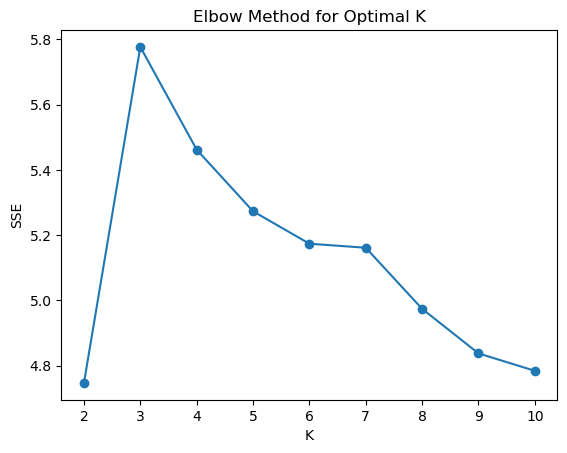

Elbow detected at K = 2


In [20]:
from kneed import KneeLocator
plt.figure()
plt.plot(range(2, 11), lista_costi1, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

# Trova l'elbow con KneeLocator
kl = KneeLocator(range(2, 11), lista_costi1, curve="convex", direction="decreasing")
print(f"Elbow detected at K = {kl.elbow}")

PROVO K=5

In [21]:
n_clusters = 5
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 77.0
Run 1, iteration: 2/100, moves: 0, cost: 77.0
Avg cost/partition: 3.08
Final centroids:
['Minneapolis' 'Hennepin' 70.0 False False False False False False False
 False False False False 7 5 'Spring' 'Cloudy' 'Day']
['Saint Paul' 'Ramsey' 18.0 False False False False False False False
 False False False False 10 12 'Winter' 'Snow' 'Day']
['Saint Paul' 'Wayne' 68.0 False False False False False False False False
 False False False 16 9 'Autumn' 'Normal' 'Day']
['Detroit' 'Wayne' 10.0 False False False False False False False False
 False False False 17 1 'Winter' 'Cloudy' 'Day']
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 15 11 'Autumn' 'Snow' 'Day']


In [22]:
predictions=model.predict(df_kmodes_rdd)

In [23]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema = StructType([
    StructField("predictions", IntegerType(), True)])
df_predictions = spark.createDataFrame(predictions.map(lambda x: (int(x),)), schema)
df_predictions.show()

+-----------+
|predictions|
+-----------+
|          1|
|          1|
|          2|
|          2|
|          3|
|          3|
|          3|
|          3|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          4|
|          4|
|          1|
|          1|
|          1|
|          1|
+-----------+
only showing top 20 rows



In [24]:
df_predictions_id = df_predictions.withColumn("row_id", monotonically_increasing_id())
joint=df_kmodes_id.join(df_predictions_id, 'row_id')

Contingency Table:
Severity       1      2    3    4
predictions                      
0            845  27137  709  784
1             37  19788  264  354
2            390  15072  454  713
3             41   8657  666  156
4            145   6856   35  164


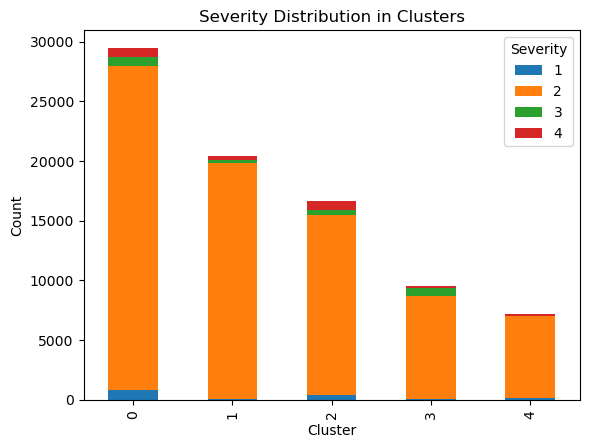

In [25]:
contingency_table = joint.groupBy('predictions', 'Severity').count().toPandas()
pivot_table = contingency_table.pivot(index='predictions', columns='Severity', values='count')


print("Contingency Table:")
print(pivot_table)


pivot_table.plot(kind='bar', stacked=True, title='Severity Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

PROVO K = 4

In [26]:
n_clusters = 4
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 69.0
Avg cost/partition: 3.45
Final centroids:
['Minneapolis' 'Hennepin' 18.0 False False False False False False False
 False False False False 16 12 'Winter' 'Cloudy' 'Day']
['Detroit' 'Wayne' 73.0 False False False False False False False False
 False False False 16 6 'Summer' 'Normal' 'Day']
['Bozeman' 'Gallatin' 27.0 False False False False False False False False
 False False False 8 3 'Spring' 'Snow' 'Day']
['Grand Rapids' 'Kent' 50.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day']


In [27]:
predictions=model.predict(df_kmodes_rdd)
#predictions.collect()
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema = StructType([
    StructField("predictions", IntegerType(), True)
])

In [28]:
df_predictions = spark.createDataFrame(predictions.map(lambda x: (int(x),)), schema)
df_predictions_id = df_predictions.withColumn("row_id", monotonically_increasing_id())
joint=df_kmodes_id.join(df_predictions_id, 'row_id')

Contingency Table:
Severity       1      2    3    4
predictions                      
0            200  40785  886  803
1            773  20063  852  956
2             46   7449  138  187
3            439   9213  252  225


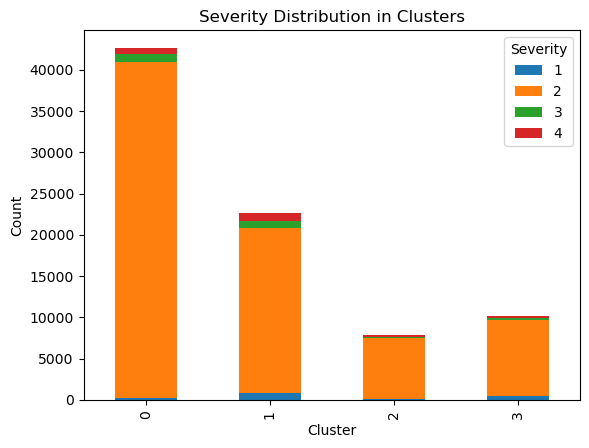

In [29]:
contingency_table = joint.groupBy('predictions', 'Severity').count().toPandas()
pivot_table = contingency_table.pivot(index='predictions', columns='Severity', values='count')


print("Contingency Table:")
print(pivot_table)


pivot_table.plot(kind='bar', stacked=True, title='Severity Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

SEASON

In [30]:
df_kmodes_season=df_kmodes.drop('season')
df_kmodes_rdd=df_kmodes_season.rdd

In [31]:
lista_costi=[]
for k in range(2,11):
    n_clusters = k
    max_iter = 10
    method = EnsembleKModes(n_clusters, max_iter)
    model = method.fit(df_kmodes_rdd)
    lista_costi.append(method.mean_cost)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 37.0
Avg cost/partition: 3.7
Final centroids:
['Minneapolis' 'Wayne' 70.0 False False False False False False False
 False False False False 15 2 'Normal' 'Day' 2]
['Cardwell' 'Jefferson' 61.0 False False False False False False False
 False False False False 20 6 'Normal' 'Night' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 48.0
Run 1, iteration: 2/100, moves: 0, cost: 48.0
Avg cost/partition: 3.2
Final centroids:
['Minneapolis' 'Hennepin' 19.0 False False False False False False False
 False False False False 7 5 'Cloudy' 'Day' 2]
['Kalispell' 'Flathead' 27.0 False False False False False False False
 False False False False 20 3 'Normal' 'Night' 2]
['Saint Paul' 'Ramsey' 18.0 False False False False False False False
 False False False False 9 12 'Snow' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 62.0
Run 1, iteration: 2/100, moves: 0, cost: 62.0
Avg cost/partition: 3.1
Final centroids:
['Grand Rapids' 'Kent' 79.0 False False False False False False False
 False False False False 15 12 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 70.0 False False False False False False False
 False False False False 16 6 'Normal' 'Day' 2]
['Minneapolis' 'Hennepin' 63.0 False False False False False False False
 False False False False 7 5 'Cloudy' 'Day' 2]
['Flint' 'Genesee' 15.0 False False False False False False False False
 False False False 18 4 'Snow' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 75.0
Avg cost/partition: 3.0
Final centroids:
['Detroit' 'Wayne' 70.0 False False False False False False False False
 False False False 15 2 'Normal' 'Day' 2]
['Saint Paul' 'Ramsey' 24.0 False False False False False False False
 False False False False 20 12 'Cloudy' 'Night' 2]
['Grand Rapids' 'Kent' 16.0 False False False False False False False
 False False False False 7 3 'Cloudy' 'Day' 2]
['Bozeman' 'Gallatin' 18.0 False False False False False False False False
 False False False 8 12 'Snow' 'Day' 2]
['Minneapolis' 'Hennepin' 23.0 False False False False False False False
 False False False False 15 4 'Cloudy' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 93.0
Run 1, iteration: 2/100, moves: 0, cost: 93.0
Avg cost/partition: 3.1
Final centroids:
['Minneapolis' 'Hennepin' 18.0 False False False False False False False
 False False False False 8 12 'Cloudy' 'Day' 2]
['Grand Rapids' 'Kent' 10.0 False False False False False False False
 False False False False 4 2 'Snow' 'Day' 2]
['Milwaukee' 'Milwaukee' 18.0 False False False False False False False
 False False False False 7 2 'Normal' 'Day' 2]
['Flint' 'Genesee' 19.0 False False False False False False False False
 False False False 18 4 'Snow' 'Day' 2]
['Kalispell' 'Flathead' 64.0 False False False False False False False
 False False False False 20 6 'Normal' 'Night' 2]
['Detroit' 'Wayne' 17.0 False False False False False False False False
 False False False 7 3 'Cloudy' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 110.0
Run 1, iteration: 2/100, moves: 0, cost: 110.0
Avg cost/partition: 3.142857142857143
Final centroids:
['Minneapolis' 'Hennepin' 65.0 False False False False False False False
 False False False False 7 12 'Cloudy' 'Day' 2]
['Grand Rapids' 'Kent' 10.0 False False False False False False False
 False False False False 4 2 'Snow' 'Night' 2]
['Saint Paul' 'Ramsey' 50.0 False False False False False False False
 False False False False 15 5 'Normal' 'Day' 2]
['Bozeman' 'Gallatin' 19.0 False False False False False False False False
 False False False 8 11 'Snow' 'Day' 2]
['Livingston' 'Park' 18.0 False False False False False False False False
 False False False 20 12 'Normal' 'Night' 2]
['Milwaukee' 'Milwaukee' 72.0 False False False False False False False
 False False False False 16 6 'Normal' 'Day' 2]
['Detroit' 'Wayne' 17.0 False False False False False False F

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 127.0
Run 1, iteration: 2/100, moves: 1, cost: 127.0
Avg cost/partition: 3.175
Final centroids:
['Detroit' 'Wayne' 9.0 False False False False False False False False
 False False False 16 6 'Cloudy' 'Day' 2]
['Grand Rapids' 'Kent' 50.0 False True False False False False False False
 False False True 6 5 'Cloudy' 'Day' 2]
['Flint' 'Genesee' 17.0 False False False False False False False False
 False False False 19 12 'Snow' 'Night' 2]
['Minneapolis' 'Hennepin' 75.0 False False False False False False False
 False False False False 8 2 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 52.0 False False False False False False False
 False False False False 7 11 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 33.0 False False False False False False False
 False False False False 6 6 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 73.0 False True False False False False False
 False False

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 137.0
Run 1, iteration: 2/100, moves: 0, cost: 137.0
Avg cost/partition: 3.0444444444444443
Final centroids:
['Minneapolis' 'Hennepin' 19.0 False False False False False False False
 False False False False 15 4 'Cloudy' 'Day' 2]
['Bozeman' 'Gallatin' 10.0 False False False False False False False False
 False False False 4 2 'Snow' 'Night' 2]
['Grand Rapids' 'Kent' 50.0 False True False False False False False False
 False False True 7 5 'Cloudy' 'Day' 2]
['Detroit' 'Wayne' 3.0 False False False False False False False False
 False False False 7 6 'Normal' 'Day' 2]
['Duluth' 'St. Louis' 30.0 False False False False False False False False
 False False False 8 12 'Snow' 'Day' 2]
['Flint' 'Genesee' 24.0 False False False False False False False False
 False False False 23 12 'Cloudy' 'Night' 2]
['Saint Paul' 'Ramsey' -2.0 False False False True False False False False

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 150.0
Run 1, iteration: 2/100, moves: 0, cost: 150.0
Avg cost/partition: 3.0
Final centroids:
['Minneapolis' 'Hennepin' 70.0 False False False False False False False
 False False False False 15 12 'Cloudy' 'Day' 2]
['Detroit' 'Wayne' 19.0 False False False False False False False False
 False False False 23 1 'Normal' 'Night' 2]
['Saint Paul' 'Ramsey' 54.0 False False False False False False False
 False False False False 7 2 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 16.0 False False False False False False False
 False False False False 8 3 'Snow' 'Day' 2]
['Livingston' 'Park' 18.0 False False False False False False False False
 False False False 19 12 'Snow' 'Night' 2]
['Detroit' 'Wayne' 50.0 False False False False False False False False
 False False False 16 3 'Cloudy' 'Day' 2]
['Flint' 'Genesee' 30.0 False False False False False False False False
 False False

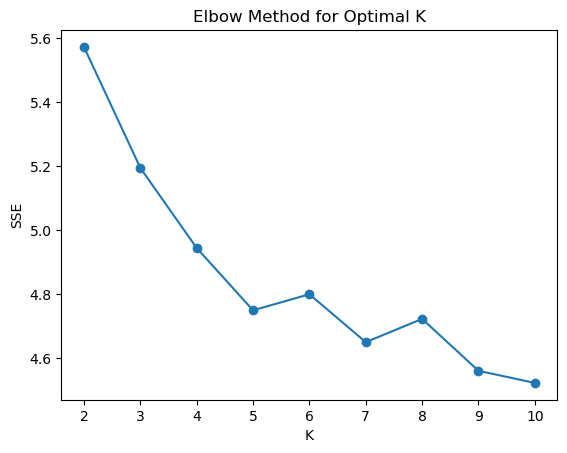

Elbow detected at K = 5


In [32]:
from kneed import KneeLocator
plt.figure()
plt.plot(range(2, 11), lista_costi, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

# Trova l'elbow con KneeLocator
kl = KneeLocator(range(2, 11), lista_costi, curve="convex", direction="decreasing")
print(f"Elbow detected at K = {kl.elbow}")

PROVO K=6

In [33]:
n_clusters = 6
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 93.0
Run 1, iteration: 2/100, moves: 0, cost: 93.0
Avg cost/partition: 3.1
Final centroids:
['Minneapolis' 'Hennepin' 17.0 False False False False False False False
 False False False False 15 4 'Cloudy' 'Day' 2]
['Livingston' 'Wayne' 18.0 False False False False False False False False
 False False False 4 2 'Snow' 'Night' 2]
['Detroit' 'Wayne' 9.0 False False False False False False False False
 False False False 16 6 'Normal' 'Day' 2]
['Cardwell' 'Jefferson' 14.0 False False False False False False False
 False False False False 22 3 'Cloudy' 'Night' 2]
['Bozeman' 'Gallatin' 1.0 False False False False False False False False
 False False False 12 2 'Snow' 'Day' 2]
['Grand Rapids' 'Kent' 52.0 False False False False False False False
 False False False False 7 5 'Cloudy' 'Day' 2]


In [34]:
predictions=model.predict(df_kmodes_rdd)

In [35]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema = StructType([
    StructField("predictions", IntegerType(), True)
])
df_predictions = spark.createDataFrame(predictions.map(lambda x: (int(x),)), schema)
df_predictions_id = df_predictions.withColumn("row_id", monotonically_increasing_id())
joint=df_kmodes_id.join(df_predictions_id, 'row_id')

Contingency Table:
season       Autumn  Spring  Summer  Winter
predictions                                
0              6221    9361    7024   10383
1              1801     959     719    5676
2              4524    3081    8153    5109
3              1152     909     418    1863
4              1347     628     112    5941
5              1551    3439    1445    1451


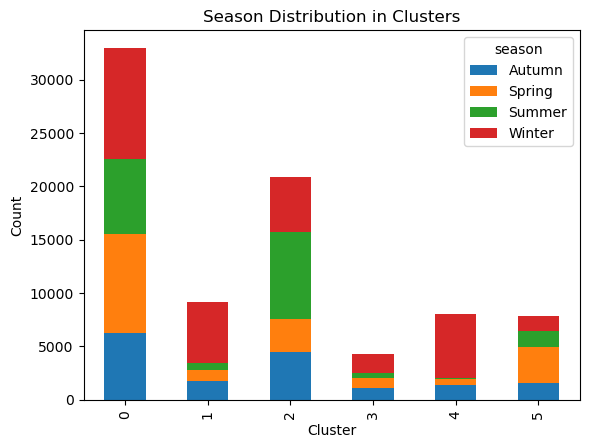

In [36]:
contingency_table = joint.groupBy('predictions', 'season').count().toPandas()
pivot_table = contingency_table.pivot(index='predictions', columns='season', values='count')


print("Contingency Table:")
print(pivot_table)


pivot_table.plot(kind='bar', stacked=True, title='Season Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

WORKING_WEEKEND

In [37]:
df_kmodes_rdd=df_kmodes.rdd

In [38]:
n_clusters = 10
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)

In [39]:
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 158.0
Run 1, iteration: 2/100, moves: 1, cost: 158.0
Avg cost/partition: 3.16
Final centroids:
['Minneapolis' 'Hennepin' 11.0 False False False False False False False
 False False False False 15 2 'Winter' 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 34.0 False False False False False False False
 False False False False 7 4 'Spring' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 15 11 'Autumn' 'Cloudy' 'Day' 2]
['Grand Rapids' 'Kent' 16.0 False False False False False False False
 False False False False 13 12 'Winter' 'Snow' 'Day' 2]
['Detroit' 'Wayne' 54.0 False False False False False False False False
 False False False 15 10 'Autumn' 'Normal' 'Day' 2]
['Billings' 'Yellowstone' 66.0 False False False False False False False
 False False False False 16 6 'Summer' 'Cloudy' 'Day' 2]
['Saint Paul' 'Way

In [40]:
lista_costi=[]
for k in range(2,11):
    n_clusters = k
    max_iter = 10
    method = EnsembleKModes(n_clusters, max_iter)
    model = method.fit(df_kmodes_rdd)
    lista_costi.append(method.mean_cost)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 37.0
Run 1, iteration: 2/100, moves: 0, cost: 37.0
Avg cost/partition: 3.7
Final centroids:
['Minneapolis' 'Hennepin' 19.0 False False False False False False False
 False False False False 7 2 'Winter' 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 79.0 False False False False False False False
 False False False False 16 8 'Summer' 'Normal' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 45.0
Run 1, iteration: 2/100, moves: 0, cost: 45.0
Avg cost/partition: 3.0
Final centroids:
['Minneapolis' 'Hennepin' 72.0 False False False False False False False
 False False False False 15 6 'Summer' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 8 12 'Winter' 'Cloudy' 'Day' 2]
['Grand Rapids' 'Kent' 36.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 68.0
Avg cost/partition: 3.4
Final centroids:
['Detroit' 'Wayne' 70.0 False False False False False False False False
 False False False 16 2 'Winter' 'Cloudy' 'Day' 2]
['Milwaukee' 'Milwaukee' 20.0 False False False False False False False
 False False False False 20 11 'Autumn' 'Normal' 'Night' 2]
['Minneapolis' 'Hennepin' 63.0 False False False False False False False
 False False False False 8 1 'Winter' 'Snow' 'Day' 2]
['Grand Rapids' 'Kent' 33.0 False False False False False False False
 False False False False 7 4 'Spring' 'Cloudy' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 85.0
Run 1, iteration: 2/100, moves: 0, cost: 85.0
Avg cost/partition: 3.4
Final centroids:
['Minneapolis' 'Hennepin' 19.0 False False False False False False False
 False False False False 15 2 'Winter' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 29.0 False False False False False False False
 False False False False 15 11 'Summer' 'Cloudy' 'Day' 2]
['Detroit' 'Wayne' 17.0 False False False False False False False False
 False False False 16 12 'Winter' 'Cloudy' 'Day' 2]
['Bozeman' 'Gallatin' 18.0 False False False False False False False False
 False False False 7 3 'Spring' 'Cloudy' 'Day' 2]
['Detroit' 'Wayne' 68.0 False False False False False False False False
 False False False 15 9 'Autumn' 'Normal' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 100.0
Run 1, iteration: 2/100, moves: 1, cost: 100.0
Avg cost/partition: 3.3333333333333335
Final centroids:
['Minneapolis' 'Hennepin' 1.0 False False False False False False False
 False False False False 15 2 'Winter' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 33.0 False False False False False False False
 False False False False 16 12 'Winter' 'Cloudy' 'Day' 2]
['Flint' 'Genesee' 25.0 False False False False False False False False
 False False False 18 4 'Spring' 'Snow' 'Day' 2]
['Bozeman' 'Gallatin' 18.0 False False False False False False False False
 False False False 20 12 'Winter' 'Cloudy' 'Night' 2]
['Detroit' 'Wayne' 73.0 False False False False False False False False
 False False False 16 6 'Summer' 'Normal' 'Day' 2]
['Detroit' 'Wayne' 10.0 False False False False False False False False
 False False False 7 3 'Spring' 'Cloudy' 'Day' 2]


Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 117.0
Run 1, iteration: 2/100, moves: 1, cost: 117.0
Avg cost/partition: 3.342857142857143
Final centroids:
['Detroit' 'Wayne' 19.0 False False False False False False False False
 False False False 15 2 'Winter' 'Cloudy' 'Day' 2]
['Kalispell' 'Flathead' 80.0 False False False False False False False
 False False False False 23 6 'Summer' 'Normal' 'Night' 2]
['Grand Rapids' 'Kent' 19.0 False False False False False False False
 False False False False 16 11 'Autumn' 'Normal' 'Day' 2]
['Saint Paul' 'Hennepin' -24.0 False False False False False False False
 False False False False 20 12 'Winter' 'Snow' 'Day' 2]
['Minneapolis' 'Hennepin' 50.0 False False False False False False False
 False False False False 15 5 'Spring' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 34.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day' 2]
['Liv

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 129.0
Run 1, iteration: 2/100, moves: 0, cost: 129.0
Avg cost/partition: 3.225
Final centroids:
['Minneapolis' 'Hennepin' 52.0 False False False False False False False
 False False False False 14 12 'Winter' 'Cloudy' 'Day' 2]
['Minneapolis' 'Hennepin' 17.0 False False False False False False False
 False False False False 20 4 'Spring' 'Snow' 'Night' 2]
['Saint Paul' 'Ramsey' 79.0 False False False False False False False
 False False False False 17 11 'Autumn' 'Normal' 'Day' 2]
['Kalispell' 'Flathead' 51.0 False False False False False False False
 False False False False 23 6 'Summer' 'Normal' 'Night' 2]
['Grand Rapids' 'Kent' 17.0 False False False False False False False
 False False False False 7 2 'Winter' 'Snow' 'Day' 2]
['Detroit' 'Wayne' 70.0 False False False False False False False False
 False False False 16 6 'Summer' 'Normal' 'Day' 2]
['Milwaukee' 'Mil

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 138.0
Run 1, iteration: 2/100, moves: 1, cost: 138.0
Avg cost/partition: 3.066666666666667
Final centroids:
['Minneapolis' 'Hennepin' 11.0 False False False False False False False
 False False False False 15 2 'Winter' 'Normal' 'Day' 2]
['Bozeman' 'Gallatin' 17.0 False False False False False False False False
 False False False 7 3 'Spring' 'Snow' 'Day' 2]
['Grand Rapids' 'Kent' 34.0 False False False False False False False
 False False False False 17 4 'Spring' 'Cloudy' 'Day' 2]
['Saint Cloud' 'Stearns' 24.0 False False False False False False False
 False False False False 20 1 'Winter' 'Cloudy' 'Night' 2]
['Detroit' 'Wayne' 63.0 False False False False False False False False
 False False False 23 6 'Summer' 'Normal' 'Night' 2]
['Saint Paul' 'Ramsey' 19.0 False False False False False False False
 False False False False 18 12 'Winter' 'Cloudy' 'Day' 2]
['Milwa

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 163.0
Run 1, iteration: 2/100, moves: 2, cost: 163.0
Avg cost/partition: 3.26
Final centroids:
['Detroit' 'Wayne' 9.0 False False False False False False False False
 False False False 16 2 'Winter' 'Normal' 'Day' 2]
['Milwaukee' 'Wayne' 63.0 False False False False False False False False
 False False False 22 6 'Summer' 'Normal' 'Night' 2]
['Minneapolis' 'Hennepin' 71.0 False False False False False False False
 False False False False 15 9 'Spring' 'Cloudy' 'Day' 2]
['Saint Paul' 'Ramsey' 17.0 False False False False False False False
 False False False False 19 12 'Winter' 'Snow' 'Night' 2]
['Grand Rapids' 'Kent' 24.0 False True False False False False False False
 False False True 7 1 'Winter' 'Cloudy' 'Day' 2]
['Flint' 'Genesee' 19.0 False False False False False False False False
 False False False 17 8 'Winter' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 34.0 Fa

In [41]:
!pip install kneed

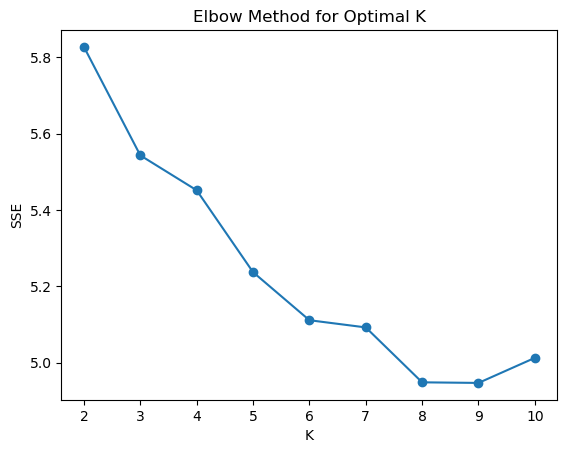

Elbow detected at K = 8


In [42]:
from kneed import KneeLocator
plt.figure()
plt.plot(range(2, 11), lista_costi, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

# Trova l'elbow con KneeLocator
kl = KneeLocator(range(2, 11), lista_costi, curve="convex", direction="decreasing")
print(f"Elbow detected at K = {kl.elbow}")

PROVO K=5

In [43]:
n_clusters = 5
max_iter = 10

method = EnsembleKModes(n_clusters, max_iter)

In [44]:
model = method.fit(df_kmodes_rdd)

Iteration  0


Iteration  1


Iteration  2


Iteration  3


Iteration  4


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 81.0
Avg cost/partition: 3.24
Final centroids:
['Detroit' 'Wayne' 19.0 False False False False False False False False
 False False False 16 2 'Winter' 'Cloudy' 'Day' 2]
['Cardwell' 'Jefferson' 27.0 False False False False False False False
 False False False False 1 3 'Spring' 'Snow' 'Night' 2]
['Milwaukee' 'Milwaukee' 19.0 False False False False False False False
 False False False False 15 11 'Autumn' 'Normal' 'Day' 2]
['Minneapolis' 'Hennepin' 63.0 False False False False False False False
 False False False False 15 5 'Spring' 'Normal' 'Day' 2]
['Grand Rapids' 'Kent' 50.0 False False False False False False False
 False False False False 7 3 'Spring' 'Cloudy' 'Day' 2]


In [45]:
predictions=model.predict(df_kmodes_rdd)

In [46]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema = StructType([
    StructField("predictions", IntegerType(), True)
])

In [47]:
df_predictions = spark.createDataFrame(predictions.map(lambda x: (int(x),)), schema)
df_predictions_id = df_predictions.withColumn("row_id", monotonically_increasing_id())
joint=df_kmodes_id.join(df_predictions_id, 'row_id')

Contingency Table:
Working_Weekend  Weekend  WorkingDay
predictions                         
0                   7482       28964
1                   1921        5536
2                   3256       15185
3                   2198       10641
4                   1597        6487


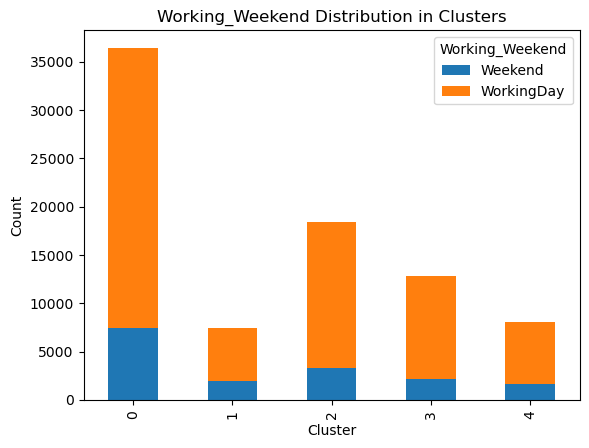

In [48]:
contingency_table = joint.groupBy('predictions', 'Working_Weekend').count().toPandas()
pivot_table = contingency_table.pivot(index='predictions', columns='Working_Weekend', values='count')


print("Contingency Table:")
print(pivot_table)


pivot_table.plot(kind='bar', stacked=True, title='Working_Weekend Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()